In [108]:
import pandas as pd
import geopandas as gpd
# import pycountry
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# import plotly.graph_objects as go
from shapely.geometry import Polygon, LineString, Point
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [104]:
# gdf['centeroid'] = gdf.centroid
gdf
gdf.loc[gdf['name']=="Germany","centeroid"].x
# ntcs['from_cordinates']
gdf.loc[gdf['name'] == 'France', 'centeroid']

43    POINT (-2.87670 42.46070)
Name: centeroid, dtype: geometry

C:\Users\User\AppData\Local\Temp/ipykernel_18508/3863356609.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid


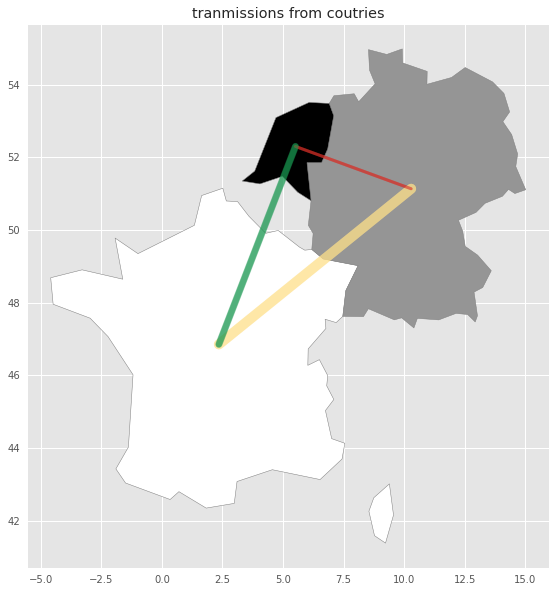

In [115]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countries = ["Germany","France","Netherlands"]
value = [1,2,3]
gdf = world.loc[world['name'].isin(countries),:].copy()
gdf['value'] = value
gdf['centeroid'] = gdf.centroid
# gdf = gpd.GeoDataFrame({'value':[1,2,3,4,5,6],'countries': countries})
# gdf['geometry'] = world.loc[world['iso_a3'].isin(countries),'geometry'].to_crs(epsg=3035)
gdf.loc[gdf['name'] == 'France', 'centeroid'] = Point(2.35, 46.85) #gpd.GeoSeries(Point(48.85,2.35))

polygon = Polygon([(-25,35), (40,35), (40,75),(-25,75)])
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=world.crs)

ntcs = pd.DataFrame({'from_node' : ["Germany","Germany","France","France","Netherlands","Netherlands"],
                    'to_node' : ["France","Netherlands","Germany","Netherlands","Germany","France",],
                    'ntc' : [10,3,10,7,3,6]})
ntcs['from_coordinates'] = [gdf.loc[gdf['name']== x, 'centeroid'] for x in ntcs['from_node']]
ntcs['to_coordinates'] = [gdf.loc[gdf['name']== x, 'centeroid'] for x in ntcs['to_node']]
ntcs['full_usage'] = [0.4,0.1,0.4,0.9,0.1,0.9]              
# ntcs['line'] = ntcs.apply(lambda x: LineString([x['from_cordinates'], x['to_cordinates']]), axis=1)
# fig,ax=gpd.subplots()
# ax=gdf.plot(ax=ax)
# poly_gdf.plot(edgecolor=”red”,ax=ax, alpha=0.1)

gdf = gpd.clip(gdf, polygon)
with plt.style.context(("seaborn", "ggplot")):
    ## Plot countries
    gdf.plot('value', figsize=(18,10), edgecolor="grey")

    ## Loop throughthe NTC data
    # for from_coordinates, to_coordinates, ntc in zip(ntcs['from_coordinates'], ntcs['to_coordinates'], ntcs['ntc']):
    for n in range(len(ntcs)):
        plt.plot([ntcs.loc[n,'from_coordinates'].x , ntcs.loc[n,'to_coordinates'].x] 
                , [ntcs.loc[n,'from_coordinates'].y, ntcs.loc[n,'to_coordinates'].y], 
                linewidth= ntcs.loc[n,'ntc'], color= cm.RdYlGn(ntcs.loc[n,'full_usage']), alpha=0.5 )

    # for slat,dlat, slon, dlon, num_flights in zip(overseas_cnt_df["LatOrig"], overseas_cnt_df["LatDest"], overseas_cnt_df["LongOrig"], overseas_cnt_df["LongDest"], overseas_cnt_df["Num_Of_Flights"]):
    #     plt.plot([slon , dlon], [slat, dlat], linewidth=num_flights/100, color="red", alpha=0.5)

    plt.title("tranmissions from coutries")

    # plt.savefig("connection-map-geopandas-1.png", dpi=100)


In [4]:
path = r"C:\Users\User\Google Drive\EW-MOD\Term paper\Model_Attempt1_Jasper"
csv_mapping = pd.read_csv(path+"\id_to_country.csv", delimiter=";")
csv_data = pd.read_csv(path+"\inflows.csv").drop("timestep", axis=1).drop("utc_timestamp", axis=1)
csv_mapping = csv_mapping.rename(columns={"Unnamed: 0":"id"})
mapping_dict ={}
for y in list(csv_mapping["zone"].unique()):
    splice = csv_mapping[csv_mapping["zone"]==y]
    mapping_dict[y] = intersection(list(splice["id"]), list(csv_data.columns))

for typ in csv_mapping["plant_type"].unique():
    sum_country = pd.DataFrame()
    splice = csv_mapping[csv_mapping["plant_type"]==typ]
    for z in mapping_dict.keys():
        sum_country[z] = csv_data.loc[:,intersection(list(mapping_dict[z]),list(splice["id"]))].sum(axis=1)
        sum_country.to_csv(path_or_buf=path+"/"+typ+"_inflow_countries.csv")


In [92]:
# intersection(list(mapping_dict["CH"]),list(splice["id"]))


(0.8240081481370484, 0.0, 0.0, 1.0)
